In [1]:
# This program utilizes the Long Short Term Memory (LSTM) method to
# predict the stock chart for a particular corporation.

In [2]:
# libraries
!pip install pandas
!pip install numpy
!pip install keras
!pip install pandas_datareader
!pip install sklearn
!pip install matplotlib
!pip install tensorflow

import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 1.4 MB 2.4 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 1.4 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=052068ec2b406fa87682669e1051a9137f4f3039ef79b8ef58cd9b06b90e2ba4
  Stored in directory: /home/kawal/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn
     |████████████████████████████████| 497.6 MB 6.3 kB/s  eta 0:00:01
     |████████████████████████████████| 126 kB 18.7 MB/s eta 0:00:01
     |████████████████████████████████| 14.5 MB 18.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 26.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 13.2 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 2.9 MB/s  eta 0:00:01
     |████████████████████████████████| 4.3 MB 33.6 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 16.5 MB/s eta 0:00:01
     |███████████

     |████████████████████████████████| 65 kB 7.4 MB/s  eta 0:00:01
     |████████████████████████████████| 156 kB 21.0 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 11.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.9 MB 26.1 MB/s eta 0:00:01
     |████████████████████████████████| 781 kB 30.7 MB/s eta 0:00:01
     |████████████████████████████████| 155 kB 29.9 MB/s eta 0:00:01
     |████████████████████████████████| 77 kB 9.6 MB/s  eta 0:00:01
     |████████████████████████████████| 151 kB 23.2 MB/s eta 0:00:01
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=51b9d049ab7eafc1d7e67b87796bb65634c8283ef73afb6bc2c0b71821ca0287
  Stored in directory: /home/kawal/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Su

In [23]:
# Get Stock Quote
stock_ticker = 'AAPL'
df = web.DataReader(stock_ticker, data_source='yahoo', start='2012-01-01', end='2022-04-10')
# Display Data
df 

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.575916
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.643499
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.783872
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.917512
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.897018
...,...,...,...,...,...,...
2022-04-04,178.490005,174.440002,174.570007,178.440002,76468400.0,178.440002
2022-04-05,178.300003,174.419998,177.500000,175.059998,73401800.0,175.059998
2022-04-06,173.630005,170.130005,172.360001,171.830002,89058800.0,171.830002


In [24]:
# Get the number of rows and columns in the data set
df.shape

(2585, 6)

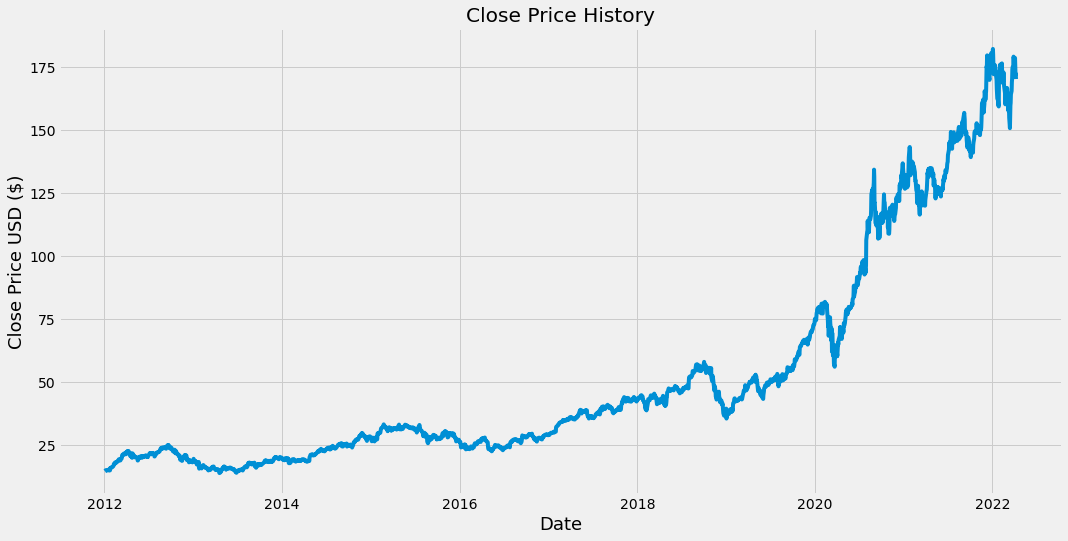

In [25]:
# Visualize the closing price 
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [26]:
# Create a new dataframe with only the 'Close column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2068

In [27]:
# Scale the data - apply preprocessing/scaling normalization
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.93942734],
       [0.94127188],
       [0.92907401]])

In [28]:
# Create the training data set
# Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.00439887, 0.00486851, 0.00584391, 0.00677256, 0.00663019,
       0.00695107, 0.00680444, 0.00655793, 0.00622217, 0.00726133,
       0.00819848, 0.00790947, 0.0063263 , 0.00783722, 0.00634968,
       0.01192796, 0.01149658, 0.01205972, 0.01327737, 0.01401476,
       0.01395314, 0.01372576, 0.01469479, 0.01560643, 0.01663922,
       0.01830739, 0.02181161, 0.02186474, 0.02381555, 0.02527333,
       0.0227679 , 0.02373267, 0.02371354, 0.02641875, 0.02603411,
       0.026746  , 0.02802528, 0.02873719, 0.03078787, 0.03228178,
       0.03271317, 0.03286405, 0.03030973, 0.02969346, 0.02978484,
       0.03218616, 0.03286193, 0.03431335, 0.03773469, 0.04229932,
       0.04144504, 0.04144716, 0.04474738, 0.04578017, 0.04504489,
       0.04437338, 0.04367423, 0.04599691, 0.04759072, 0.04825798])]
[0.04660893460974819]



In [29]:
# Convert the x_train and y_train to numpy arrays, so that we can train the LSTM model

x_train, y_train = np.array(x_train), np.array(y_train)

In [30]:
# Reshape the data, so that we can change the shape from 2 dimensions to 3

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2008, 60, 1)

In [31]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [32]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [33]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2008/2008 [==============================] - 31s 14ms/step - loss: 1.9873e-04


In [34]:
# Create the testing data set 
# Create a new array containing scaled values from index 1896 to 2444

test_data = scaled_data[training_data_len - 60:, :]

# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [35]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [36]:
# Reshape the data from 2 dimensions to 3
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [37]:
# Get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [38]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

5.027006330065847

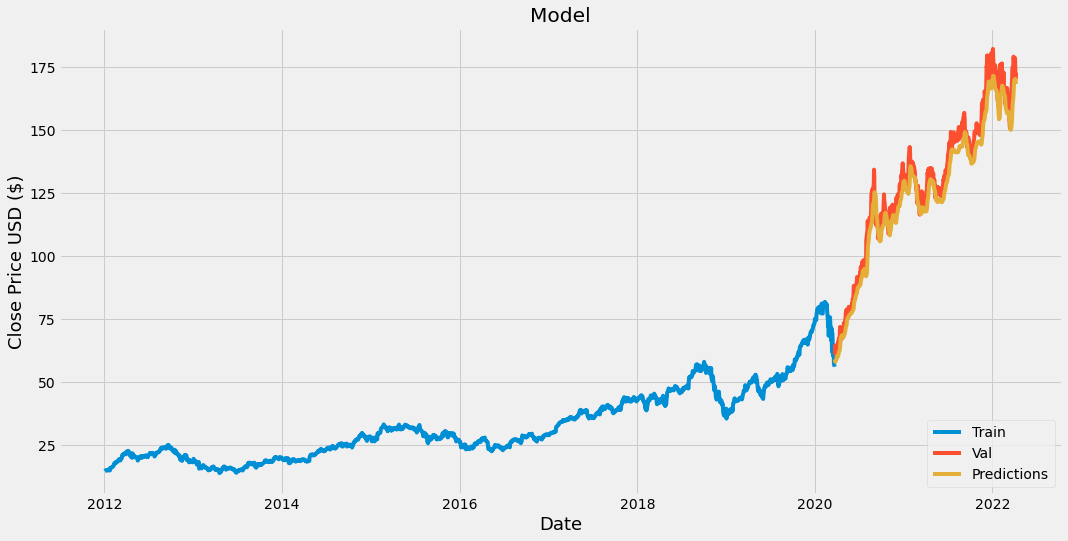

In [39]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [40]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-03-24,61.720001,58.979424
2020-03-25,61.380001,58.259033
2020-03-26,64.610001,58.011749
2020-03-27,61.935001,58.449799
2020-03-30,63.702499,58.901958
...,...,...
2022-04-04,178.440002,169.821259
2022-04-05,175.059998,170.134781
2022-04-06,171.830002,169.972748


In [41]:
# Get the quote
stock_quote = web.DataReader(stock_ticker, data_source='yahoo', start='2012-01-01', end='2022-04-10')
# Create a new dataframe
new_df = stock_quote.filter(['Close'])
# Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[166.827]]


In [43]:
stock_quote2 = web.DataReader(stock_ticker, data_source='yahoo', start='2022-04-10', end='2022-04-10')
print(stock_quote2['Close'])

KeyError: 'Date'